In [1]:
import pandas as pd
import numpy as np

In [2]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
df_train = pd.read_csv('apr-train-cat.csv',low_memory=False)

In [4]:
df_train.head()

,x_ray_image_file_name,category
0,1.jpg,"Computers, Laptops and Accessories"
1,2.jpg,"Mobile Phone, Tablets and Accessories"
2,4.jpg,"Books, Software and E-learning"
3,5.jpg,"Books, Software and E-learning"
4,6.jpg,"Books, Software and E-learning"


In [5]:
df_test = pd.read_csv('apr-test-cat.csv',low_memory=False)

In [6]:
df_test.head()

,x_ray_image_file_name,predictions
0,200001.jpg,Home and Kitchen
1,200002.jpg,"Watches, Eyewear and Jewellery"
2,200003.jpg,"Mobile Phone, Tablets and Accessories"
3,200004.jpg,"Mobile Phone, Tablets and Accessories"
4,200005.jpg,"Mobile Phone, Tablets and Accessories"


In [7]:
sz = 224
arch = dn201
bs = 64
path='data/delhivery'

In [8]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,aug_tfms=[RandomFlip()])

In [9]:
data = ImageClassifierData.from_csv(path='data/delhivery/',folder='train',csv_fname='apr-train-cat.csv',tfms=(trn_tfms,val_tfms),bs=bs,num_workers=4)

In [10]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
x,y=next(iter(data.val_dl))

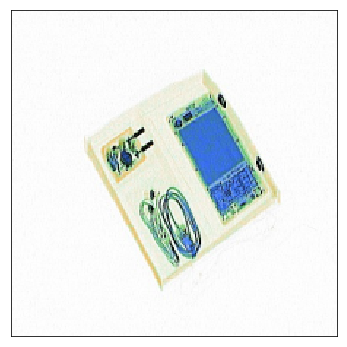

In [11]:
show_img(data.val_ds.denorm(to_np(x))[8],figsize=(6,6))

In [12]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 83%|████████▎ | 1178/1413 [00:27<00:05, 43.02it/s, loss=5.01]

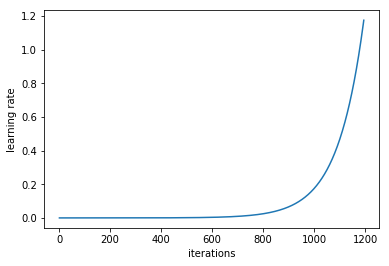

In [13]:
lrf=learn.lr_find()
learn.sched.plot_lr()

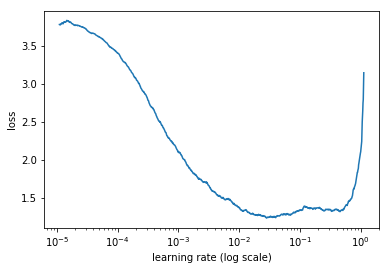

In [14]:
learn.sched.plot()

In [15]:
learn.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

  7%|▋         | 102/1413 [00:02<00:28, 46.63it/s, loss=2.31]

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                     
    0      1.123671   1.066211   0.715386  
    1      1.036906   1.001061   0.724726                      
    2      1.000271   0.966942   0.732073                      
    3      0.951648   0.954353   0.735437                      
    4      0.939164   0.938367   0.737429                      



[0.93836653, 0.73742917847025491]

In [16]:
learn.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.928379   0.930104   0.739554  
    1      0.932042   0.92243    0.74066                       
    2      0.886226   0.915503   0.743626                      
    3      0.927651   0.9106     0.74429                       
    4      0.88372    0.902868   0.74637                       



[0.90286767, 0.74637039660056659]

In [17]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.863197   0.899984   0.745795  
    1      0.899931   0.904763   0.746326                      
    2      0.828631   0.902955   0.747123                      
    3      0.847771   0.896143   0.748893                      
    4      0.813213   0.90296    0.744954                      



[0.90295953, 0.74495396600566577]

In [18]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(16,16))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [19]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)


0.74535233711048154

Confusion matrix, without normalization
[[   12     4     0     0     2     1     0     1     0     0     0     0     0     0     0    16     0     0
      1     1     0     0     0     0     6     3]
 [    0   583     0     0     1     0     1     4     1    14     0     6     0     5     0    40     0     0
     11     9     0     0     0     0    10    32]
 [    0     4    22     0     2     0     3     5    10     0     0     0     0     1     0    36     0     0
      1     0     0     0     0     0     4     7]
 [    0     1     0     0     1     0     0     0     0     0     0     0     0     0     0     2     0     0
      0     0     0     0     0     0     1     0]
 [    0     7     0     1    60     1     4     1     0     1     0     0     1     0     0    69     0     0
      0     2     0     0     0     0    11     9]
 [    0     1     0     0     1    26     0     3     4     1     0     0     8     2     0   102     0     0
      2     1     0     0     2     0     7  

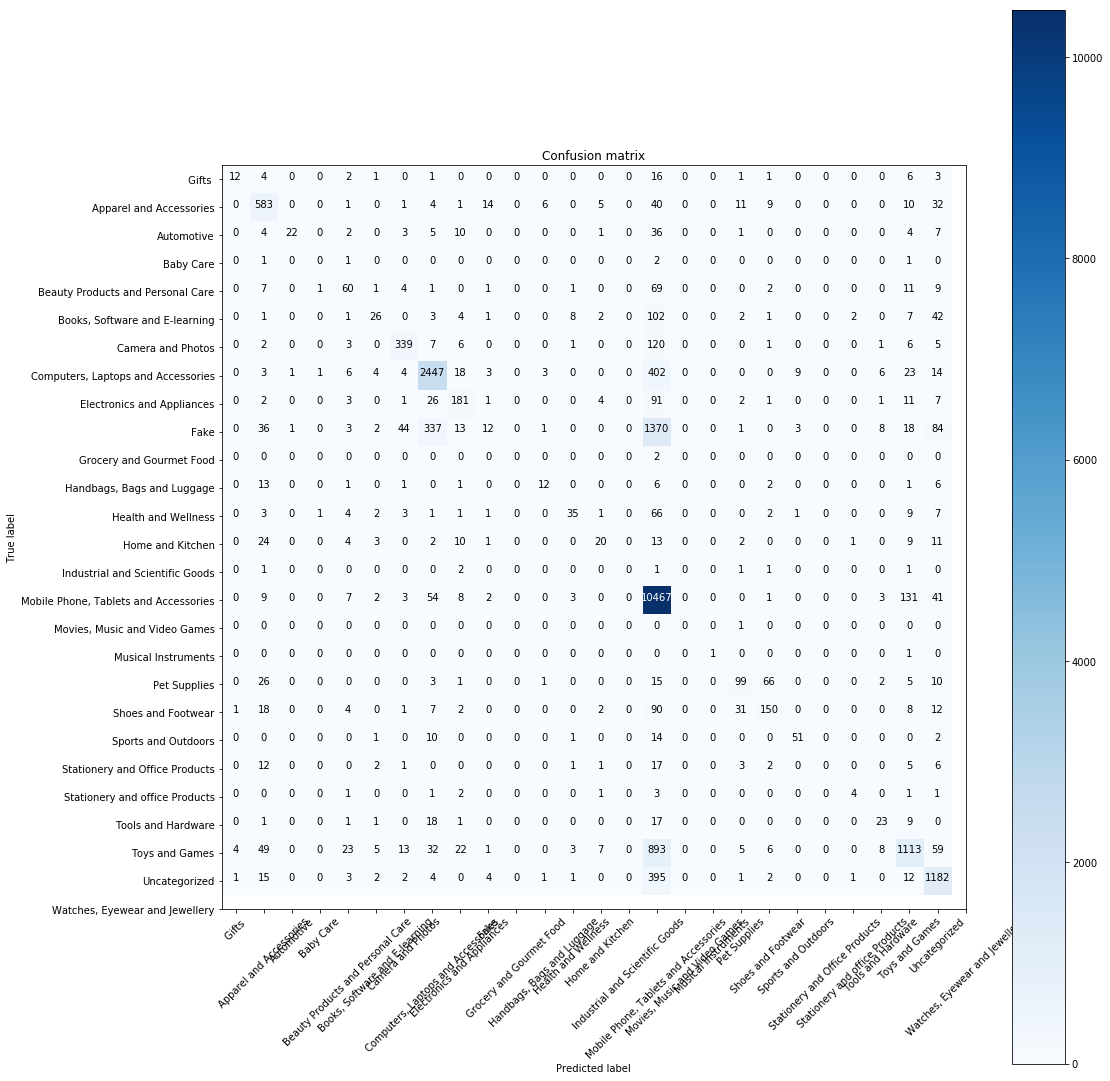

In [20]:
predictions = np.argmax(probs,axis=1)
cm = confusion_matrix(y, predictions)
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

In [21]:
preds = predictions

In [22]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [23]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [24]:
PATH= '/home/paperspace/fastai/courses/dl1/data/delhivery/'

Correctly classified


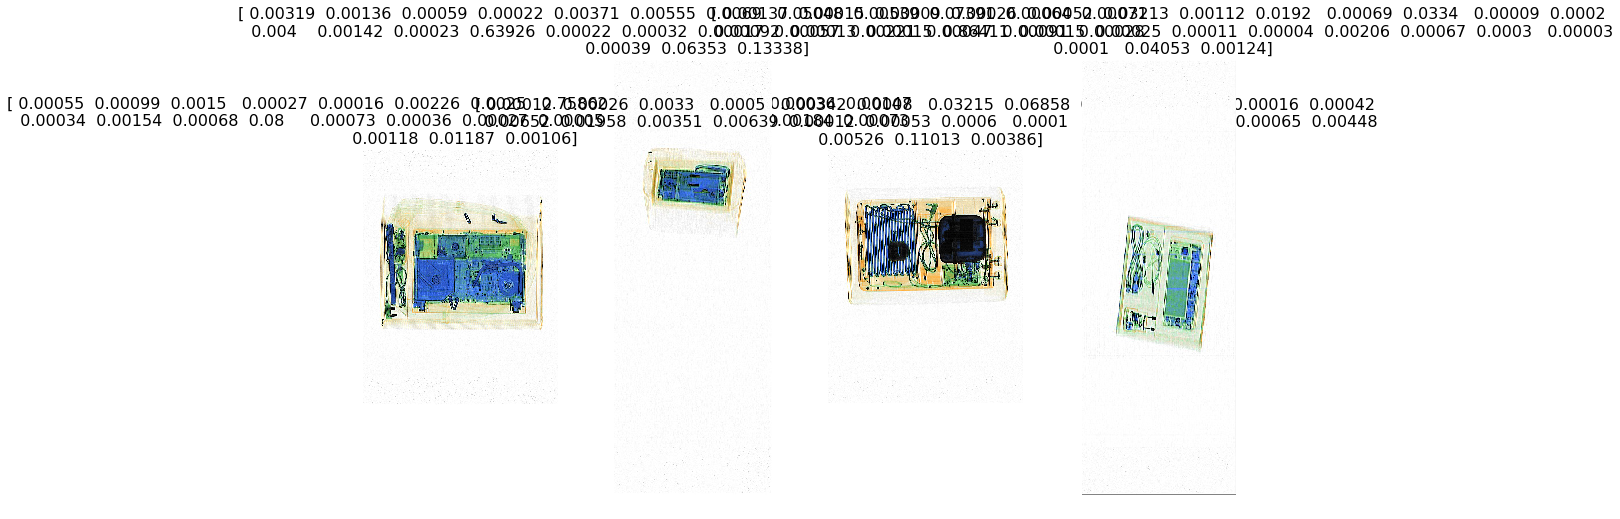

In [25]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


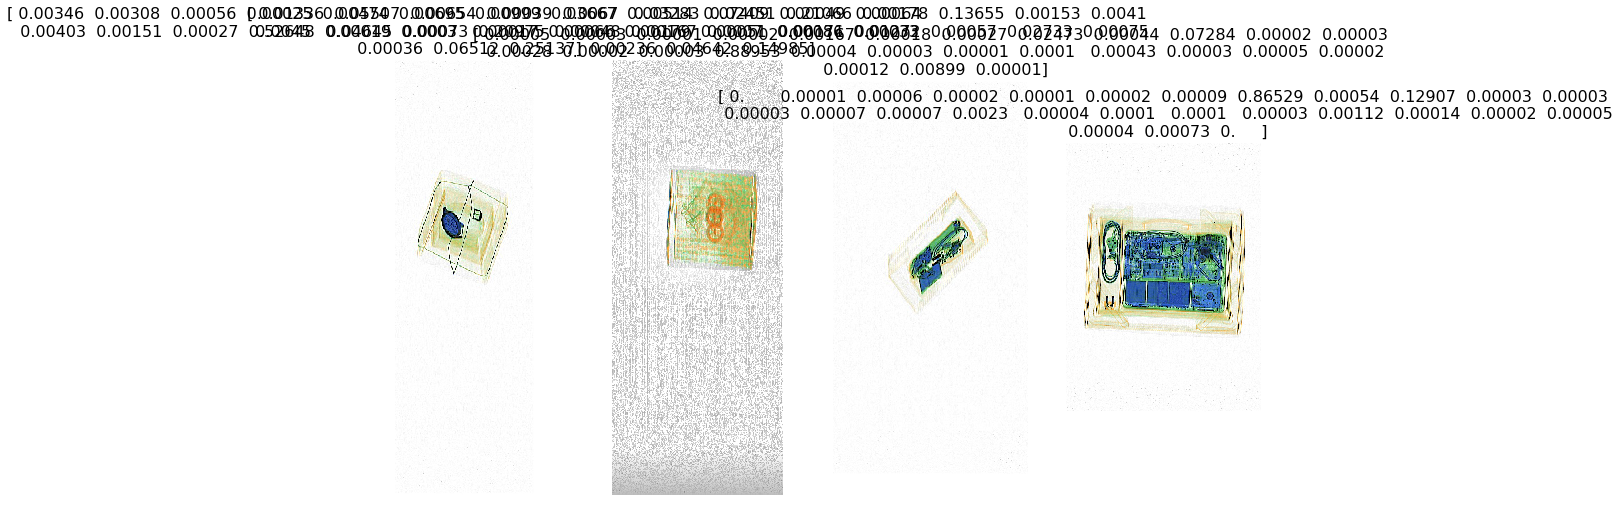

In [26]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [27]:
learn.unfreeze()

In [28]:
test_name = '/home/paperspace/fastai/courses/dl1/'+path+'/train/698.jpg'
im = val_tfms(open_image(test_name))
pred = learn.predict_array(im[None])

In [29]:
np.exp(pred)


array([[ 0.00227,  0.0024 ,  0.00011,  0.00031,  0.00213,  0.00616,  0.01432,  0.0425 ,  0.00275,  0.1318 ,
         0.00032,  0.00025,  0.00244,  0.0004 ,  0.0004 ,  0.74278,  0.00014,  0.00038,  0.00019,  0.00034,
         0.00513,  0.00038,  0.00067,  0.00042,  0.00067,  0.03655,  0.00381]], dtype=float32)

In [30]:
data.classes[np.argmax(pred[0,:])]


'Mobile Phone, Tablets and Accessories'

In [31]:
np.exp(pred[0,9])

0.13180099

In [32]:
data.classes[9]

'Fake'

In [33]:
df_test_org = pd.read_csv('apr-test-cat.csv',low_memory=False)


In [34]:
df_test_org[:20]


,x_ray_image_file_name,predictions
0,200001.jpg,Home and Kitchen
1,200002.jpg,"Watches, Eyewear and Jewellery"
2,200003.jpg,"Mobile Phone, Tablets and Accessories"
3,200004.jpg,"Mobile Phone, Tablets and Accessories"
4,200005.jpg,"Mobile Phone, Tablets and Accessories"
5,200006.jpg,"Mobile Phone, Tablets and Accessories"
6,200008.jpg,"Mobile Phone, Tablets and Accessories"
7,200010.jpg,Uncategorized
8,200011.jpg,"Watches, Eyewear and Jewellery"
9,200012.jpg,"Watches, Eyewear and Jewellery"


In [ ]:
for i,row in df_test_org.iterrows():
    pic_name = row['x_ray_image_file_name']
    full_path = '/home/paperspace/fastai/courses/dl1/'+path+'/test/'+pic_name
    image = val_tfms(open_image(full_path))
    pred = learn.predict_array(image[None])
    try:    
        our_pred = row['predictions']
        actual_pred = data.classes[np.argmax(pred[0,:])]
        print(str(i)+" "+our_pred+" "+actual_pred)
        if our_pred != actual_pred and our_pred != 'Uncategorized':
            index_of_our_pred = data.classes.index(our_pred)
            if index_of_our_pred == 7 or index_of_our_pred == 15 or index_of_our_pred==1 or index_of_our_pred==26 or index_of_our_pred==1:
                if np.exp(pred[0,index_of_our_pred])<0.4:
                    df_test_org.loc[i,'product_description']=False
                else:
                    df_test_org.loc[i,'product_description']=True

        else:
            df_test_org.loc[i,'product_description']=True
            
        if actual_pred == 'Fake':
            print("fake")
            df_test_org.loc[i,'product_description']=False
            
            
        
    except:
        df_test_org.loc[i,'product_description']=True
        print("Error")

0 Home and Kitchen Apparel and Accessories
1 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
2 Mobile Phone, Tablets and Accessories Apparel and Accessories
3 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7 Uncategorized Watches, Eyewear and Jewellery
8 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
9 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
10 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
11 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
12 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
13 Uncategorized Watches, Eyewear and Jewellery
14 Toys and Games Toys and Games
15 Mobile Phone, Tablets and Accessories Mobile Phon

127 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
128 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
129 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
130 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
131 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
132 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
133 Computers, Laptops and Accessories Computers, Laptops and Accessories
134 Electronics and Appliances Electronics and Appliances
135 Electronics and Appliances Electronics and Appliances
136 Electronics and Appliances Electronics and Appliances
137 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
138 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
139 Books, Software and E-learning Mobile Phone, Tablets and Accessories
140 Mobile Phone, Tablets and Accessori

236 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
237 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
238 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
239 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
240 Camera and Photos Camera and Photos
241 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
242 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
243 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
244 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
245 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
246 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
247 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
248 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories


347 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
348 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
349 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
350 Computers, Laptops and Accessories Computers, Laptops and Accessories
351 Computers, Laptops and Accessories Computers, Laptops and Accessories
352 Computers, Laptops and Accessories Computers, Laptops and Accessories
353 Electronics and Appliances Computers, Laptops and Accessories
354 Computers, Laptops and Accessories Computers, Laptops and Accessories
355 Uncategorized Uncategorized
356 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
357 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
358 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
359 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
360 Mobile Phone, Tablets and Accessories Mobi

459 Handbags, Bags and Luggage Beauty Products and Personal Care
460 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
461 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
462 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
463 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
464 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
465 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
466 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
467 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
468 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
469 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
470 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
471 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessor

568 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
569 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
570 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
571 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
572 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
573 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
574 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
575 Apparel and Accessories Apparel and Accessories
576 Apparel and Accessories Apparel and Accessories
577 Mobile Phone, Tablets and Accessories Camera and Photos
578 Camera and Photos Camera and Photos
579 Computers, Laptops and Accessories Computers, Laptops and Accessories
580 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
581 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
582 Mobile Phone

687 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
688 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
689 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
690 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
691 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
692 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
693 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
694 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
695 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
696 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
697 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
698 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
699 Mobile Phone, Tablets and Accessorie

797 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
798 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
799 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
800 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
801 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
802 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
803 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
804 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
805 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
806 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
807 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
808 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
809 Mobile Phone, Tablets and Accessorie

904 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
905 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
906 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
907 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
908 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
909 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
910 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
911 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
912 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
913 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
914 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
915 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
916 Mobile Phone, Tablets and Accessorie

1023 Computers, Laptops and Accessories Computers, Laptops and Accessories
1024 Computers, Laptops and Accessories Computers, Laptops and Accessories
1025 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1026 Camera and Photos Mobile Phone, Tablets and Accessories
1027 Camera and Photos Camera and Photos
1028 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
1029 Mobile Phone, Tablets and Accessories Watches, Eyewear and Jewellery
1030 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1031 Books, Software and E-learning Mobile Phone, Tablets and Accessories
1032 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1033 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1034 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1035 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1036 Mobile Phone, Tablets and Accessori

1129 Camera and Photos Camera and Photos
1130 Camera and Photos Camera and Photos
1131 Camera and Photos Camera and Photos
1132 Camera and Photos Camera and Photos
1133 Camera and Photos Camera and Photos
1134 Mobile Phone, Tablets and Accessories Camera and Photos
1135 Camera and Photos Camera and Photos
1136 Camera and Photos Camera and Photos
1137 Health and Wellness Mobile Phone, Tablets and Accessories
1138 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1139 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1140 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1141 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1142 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1143 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1144 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1145 Mobile Phone, Tab

1239 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1240 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1241 Camera and Photos Camera and Photos
1242 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1243 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1244 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1245 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1246 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1247 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1248 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1249 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1250 Camera and Photos Camera and Photos
1251 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1252 Mobile Phone, Tablets 

1349 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1350 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1351 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1352 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1353 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1354 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1355 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1356 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1357 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1358 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1359 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1360 Mobile Phone, Tablets and Accessories Camera and Photos
1361 Mobile Phone, Tablets and Accessories Mobil

1459 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1460 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1461 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1462 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
1463 Uncategorized Watches, Eyewear and Jewellery
1464 Camera and Photos Camera and Photos
1465 Computers, Laptops and Accessories Computers, Laptops and Accessories
1466 Computers, Laptops and Accessories Watches, Eyewear and Jewellery
1467 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1468 Camera and Photos Camera and Photos
1469 Electronics and Appliances Electronics and Appliances
1470 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1471 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1472 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1473 Mobile Phone, Tablets an

1574 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1575 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1576 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1577 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1578 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1579 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1580 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1581 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1582 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1583 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1584 Apparel and Accessories Apparel and Accessories
1585 Apparel and Accessories Apparel and Accessories
1586 Apparel and Accessories Apparel and Accessories
1587 Apparel and Accessories Ap

1682 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1683 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1684 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1685 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1686 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1687 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1688 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1689 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1690 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1691 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1692 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1693 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1694 Mobile Phone, Tablets a

1789 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1790 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1791 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1792 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1793 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1794 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1795 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1796 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1797 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1798 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1799 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1800 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1801 Mobile Phone, Tablets a

1899 Electronics and Appliances Electronics and Appliances
1900 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
1901 Computers, Laptops and Accessories Computers, Laptops and Accessories
1902 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1903 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1904 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1905 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1906 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1907 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1908 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1909 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1910 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
1911 Mobile Phone, Tablets and Accessories Mobile Phone, Ta

2012 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2013 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2014 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2015 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2016 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2017 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2018 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2019 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2020 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2021 Camera and Photos Camera and Photos
2022 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2023 Books, Software and E-learning Mobile Phone, Tablets and Accessories
2024 Books, Software and E-learning Mobile Phone, Tablets and Accessories
2

2118 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2119 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2120 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2121 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2122 Computers, Laptops and Accessories Computers, Laptops and Accessories
2123 Computers, Laptops and Accessories Computers, Laptops and Accessories
2124 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2125 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2126 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2127 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2128 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2129 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2130 Mobile Phone, Tablets and Accessori

2230 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2231 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2232 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2233 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2234 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2235 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2236 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2237 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2238 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2239 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2240 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2241 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2242 Mobile Phone, Tablets a

2339 Electronics and Appliances Electronics and Appliances
2340 Electronics and Appliances Beauty Products and Personal Care
2341 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2342 Computers, Laptops and Accessories Computers, Laptops and Accessories
2343 Computers, Laptops and Accessories Computers, Laptops and Accessories
2344 Computers, Laptops and Accessories Computers, Laptops and Accessories
2345 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2346 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2347 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
2348 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2349 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2350 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2351 Electronics and Appliances Electronics and Appliances
2352 Electronics and Applia

2451 Camera and Photos Mobile Phone, Tablets and Accessories
2452 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2453 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2454 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2455 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2456 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
2457 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2458 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2459 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2460 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2461 Camera and Photos Camera and Photos
2462 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2463 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2464 Mobile Ph

2561 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2562 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2563 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2564 Apparel and Accessories Apparel and Accessories
2565 Apparel and Accessories Apparel and Accessories
2566 Apparel and Accessories Apparel and Accessories
2567 Apparel and Accessories Apparel and Accessories
2568 Apparel and Accessories Apparel and Accessories
2569 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2570 Camera and Photos Mobile Phone, Tablets and Accessories
2571 Camera and Photos Camera and Photos
2572 Books, Software and E-learning Mobile Phone, Tablets and Accessories
2573 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2574 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
2575 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories

2670 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2671 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2672 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2673 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2674 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2675 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2676 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2677 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2678 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2679 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2680 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2681 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2682 Camera and Photos Camer

2780 Computers, Laptops and Accessories Computers, Laptops and Accessories
2781 Camera and Photos Camera and Photos
2782 Computers, Laptops and Accessories Computers, Laptops and Accessories
2783 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2784 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
2785 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2786 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2787 Camera and Photos Camera and Photos
2788 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2789 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2790 Books, Software and E-learning Mobile Phone, Tablets and Accessories
2791 Books, Software and E-learning Mobile Phone, Tablets and Accessories
2792 Books, Software and E-learning Mobile Phone, Tablets and Accessories
2793 Books, Software and E-learning Mobile Phone, Tablets and Accessories


2892 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2893 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2894 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2895 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2896 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2897 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2898 Computers, Laptops and Accessories Computers, Laptops and Accessories
2899 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2900 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2901 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2902 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2903 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2904 Mobile Phone, Tablets and Acc

3006 Electronics and Appliances Electronics and Appliances
3007 Electronics and Appliances Computers, Laptops and Accessories
3008 Electronics and Appliances Electronics and Appliances
3009 Electronics and Appliances Computers, Laptops and Accessories
3010 Computers, Laptops and Accessories Computers, Laptops and Accessories
3011 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3012 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
3013 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3014 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3015 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3016 Electronics and Appliances Beauty Products and Personal Care
3017 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3018 Computers, Laptops and Accessories Computers, Laptops and Accessories
3019 Computers, Laptops and Accessories Computers

3118 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3119 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3120 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3121 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3122 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3123 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3124 Books, Software and E-learning Mobile Phone, Tablets and Accessories
3125 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3126 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3127 Apparel and Accessories Apparel and Accessories
3128 Apparel and Accessories Apparel and Accessories
3129 Apparel and Accessories Apparel and Accessories
3130 Apparel and Accessories Apparel and Accessories
3131 Apparel and Accessories Apparel and Accessories
3132 Mobile P

3229 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3230 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3231 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3232 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3233 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3234 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3235 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
3236 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
3237 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
3238 Mobile Phone, Tablets and Accessories Camera and Photos
3239 Books, Software and E-learning Mobile Phone, Tablets and Accessories
3240 Books, Software and E-learning Mobile Phone, Tablets and Accessories
3241 Books, Software and E-learning Books, Software and E-learning
3242 Mobile Phone, Tablets and Access

3337 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3338 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3339 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3340 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3341 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3342 Mobile Phone, Tablets and Accessories Books, Software and E-learning
3343 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3344 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3345 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3346 Camera and Photos Camera and Photos
3347 Camera and Photos Camera and Photos
3348 Camera and Photos Camera and Photos
3349 Camera and Photos Mobile Phone, Tablets and Accessories
3350 Apparel and Accessories Apparel and Accessories
3351 Apparel and Accessories Apparel and 

3461 Computers, Laptops and Accessories Computers, Laptops and Accessories
3462 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3463 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
3464 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
3465 Computers, Laptops and Accessories Computers, Laptops and Accessories
3466 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
3467 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3468 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3469 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3470 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
3471 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
3472 Uncategorized Mobile Phone, Tablets and Accessories
3473 Sports and Outdoors Sports and Outdoors
3474 Mobile Phone, Tablets and Accessories 

3589 Stationery and office Products Watches, Eyewear and Jewellery
3590 Stationery and office Products Apparel and Accessories
3591 Stationery and office Products Apparel and Accessories
3592 Stationery and office Products Apparel and Accessories
3593 Stationery and office Products Apparel and Accessories
3594 Stationery and office Products Apparel and Accessories
3595 Stationery and office Products Shoes and Footwear
3596 Stationery and office Products Mobile Phone, Tablets and Accessories
3597 Stationery and office Products Apparel and Accessories
3598 Stationery and office Products Watches, Eyewear and Jewellery
3599 Stationery and office Products Mobile Phone, Tablets and Accessories
3600 Stationery and office Products Mobile Phone, Tablets and Accessories
3601 Stationery and office Products Mobile Phone, Tablets and Accessories
3602 Stationery and office Products Watches, Eyewear and Jewellery
3603 Stationery and office Products Mobile Phone, Tablets and Accessories
3604 Stationer

3727 Stationery and office Products Mobile Phone, Tablets and Accessories
3728 Stationery and office Products Mobile Phone, Tablets and Accessories
3729 Stationery and office Products Mobile Phone, Tablets and Accessories
3730 Stationery and office Products Apparel and Accessories
3731 Stationery and office Products Apparel and Accessories
3732 Stationery and office Products Apparel and Accessories
3733 Stationery and office Products Apparel and Accessories
3734 Stationery and office Products Apparel and Accessories
3735 Stationery and office Products Mobile Phone, Tablets and Accessories
3736 Stationery and office Products Shoes and Footwear
3737 Stationery and office Products Apparel and Accessories
3738 Stationery and office Products Mobile Phone, Tablets and Accessories
3739 Stationery and office Products Shoes and Footwear
3740 Stationery and office Products Mobile Phone, Tablets and Accessories
3741 Stationery and office Products Apparel and Accessories
3742 Stationery and office

3862 Stationery and office Products Apparel and Accessories
3863 Stationery and office Products Apparel and Accessories
3864 Stationery and office Products Apparel and Accessories
3865 Stationery and office Products Sports and Outdoors
3866 Stationery and office Products Mobile Phone, Tablets and Accessories
3867 Stationery and office Products Shoes and Footwear
3868 Stationery and office Products Apparel and Accessories
3869 Stationery and office Products Apparel and Accessories
3870 Stationery and office Products Sports and Outdoors
3871 Stationery and office Products Apparel and Accessories
3872 Stationery and office Products Apparel and Accessories
3873 Stationery and office Products Apparel and Accessories
3874 Stationery and office Products Apparel and Accessories
3875 Stationery and office Products Apparel and Accessories
3876 Stationery and office Products Apparel and Accessories
3877 Stationery and office Products Apparel and Accessories
3878 Stationery and office Products Spo

3998 Stationery and office Products Apparel and Accessories
3999 Stationery and office Products Watches, Eyewear and Jewellery
4000 Stationery and office Products Apparel and Accessories
4001 Stationery and office Products Apparel and Accessories
4002 Stationery and office Products Apparel and Accessories
4003 Stationery and office Products Mobile Phone, Tablets and Accessories
4004 Stationery and office Products Shoes and Footwear
4005 Stationery and office Products Apparel and Accessories
4006 Stationery and office Products Mobile Phone, Tablets and Accessories
4007 Stationery and office Products Mobile Phone, Tablets and Accessories
4008 Stationery and office Products Apparel and Accessories
4009 Stationery and office Products Sports and Outdoors
4010 Stationery and office Products Mobile Phone, Tablets and Accessories
4011 Stationery and office Products Watches, Eyewear and Jewellery
4012 Stationery and office Products Apparel and Accessories
4013 Stationery and office Products App

4136 Stationery and office Products Sports and Outdoors
4137 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4138 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4139 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4140 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4141 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4142 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4143 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4144 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4145 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
4146 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4147 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4148 Mobile Phone, Tablets and Accessories Mobile Phone,

4243 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4244 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4245 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4246 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4247 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4248 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4249 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4250 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4251 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4252 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4253 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4254 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4255 Mobile Phone, Tablets a

4350 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
4351 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
4352 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4353 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4354 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4355 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4356 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4357 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4358 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4359 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4360 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4361 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4362 Mobile Phone, Tablets and Accessories

4454 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4455 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4456 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4457 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4458 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4459 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4460 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4461 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4462 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4463 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4464 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4465 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4466 Mobile Phone, Tablets a

4557 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4558 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4559 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4560 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4561 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4562 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4563 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4564 Mobile Phone, Tablets and Accessories Uncategorized
4565 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4566 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4567 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4568 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4569 Mobile Phone, Tablets and Accessories Mobile Ph

4662 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4663 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4664 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4665 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4666 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4667 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4668 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4669 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4670 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4671 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4672 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4673 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4674 Mobile Phone, Tablets a

4764 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4765 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4766 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4767 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4768 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4769 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4770 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4771 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4772 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4773 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4774 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4775 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4776 Mobile Phone, Tablets a

4871 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4872 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4873 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4874 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4875 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4876 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4877 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4878 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4879 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4880 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4881 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4882 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4883 Mobile Phone, Tablets a

4974 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4975 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
4976 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4977 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4978 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4979 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4980 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4981 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4982 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4983 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4984 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4985 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
4986 Mobile Phone, Tablets and 

5080 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5081 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5082 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5083 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5084 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5085 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5086 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5087 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5088 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5089 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5090 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5091 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5092 Mobile Phone, Tablets a

5187 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5188 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5189 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5190 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5191 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5192 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5193 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5194 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5195 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5196 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5197 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5198 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5199 Mobile Phone, Tablets a

5294 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5295 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5296 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5297 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5298 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5299 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5300 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5301 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5302 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5303 Uncategorized Mobile Phone, Tablets and Accessories
5304 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5305 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5306 Mobile Phone, Tablets and Accessories Mobile Ph

5396 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5397 Mobile Phone, Tablets and Accessories Watches, Eyewear and Jewellery
5398 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5399 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5400 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5401 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5402 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5403 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5404 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5405 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5406 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5407 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5408 Mobile Phone, Tablets and Acce

5501 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5502 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5503 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5504 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5505 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5506 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5507 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5508 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5509 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5510 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5511 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5512 Apparel and Accessories Apparel and Accessories
5513 Apparel and Accessories Apparel and Accessories
551

5626 Computers, Laptops and Accessories Computers, Laptops and Accessories
5627 Camera and Photos Camera and Photos
5628 Camera and Photos Camera and Photos
5629 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5630 Computers, Laptops and Accessories Computers, Laptops and Accessories
5631 Uncategorized Mobile Phone, Tablets and Accessories
5632 Computers, Laptops and Accessories Computers, Laptops and Accessories
5633 Apparel and Accessories Apparel and Accessories
5634 Apparel and Accessories Apparel and Accessories
5635 Shoes and Footwear Apparel and Accessories
5636 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5637 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5638 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5639 Computers, Laptops and Accessories Computers, Laptops and Accessories
5640 Computers, Laptops and Accessories Computers, Laptops and Accessories
5641 Mob

5737 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5738 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5739 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5740 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5741 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5742 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5743 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5744 Sports and Outdoors Sports and Outdoors
5745 Computers, Laptops and Accessories Computers, Laptops and Accessories
5746 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5747 Computers, Laptops and Accessories Computers, Laptops and Accessories
5748 Computers, Laptops and Accessories Computers, Laptops and Accessories
5749 Computers, Laptops and Accessories Computers, Laptops and Accessories
5750 Mo

5854 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5855 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5856 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5857 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5858 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5859 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5860 Books, Software and E-learning Mobile Phone, Tablets and Accessories
5861 Computers, Laptops and Accessories Computers, Laptops and Accessories
5862 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5863 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5864 Computers, Laptops and Accessories Computers, Laptops and Accessories
5865 Computers, Laptops and Accessories Computers, Laptops and Accessories
5866 Mobile Phone, Tablets and Accessories Mobile Pho

5967 Camera and Photos Mobile Phone, Tablets and Accessories
5968 Computers, Laptops and Accessories Computers, Laptops and Accessories
5969 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
5970 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5971 Computers, Laptops and Accessories Computers, Laptops and Accessories
5972 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5973 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
5974 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5975 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5976 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5977 Mobile Phone, Tablets and Accessories Camera and Photos
5978 Camera and Photos Camera and Photos
5979 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
5980 Camera and Photos Watches, Eyewear and Jewel

6080 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6081 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6082 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6083 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6084 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6085 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6086 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6087 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6088 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6089 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6090 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6091 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6092 Electronics and Applian

6190 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6191 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6192 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6193 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6194 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6195 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6196 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6197 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6198 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6199 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6200 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6201 Beauty Products and Personal Care Mobile Phone, Tablets and Accessories
6202 Mobile Phone, Tablets and A

6297 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6298 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6299 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6300 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6301 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6302 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6303 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6304 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6305 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6306 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6307 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6308 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6309 Mobile Phone, Tablets a

6404 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6405 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6406 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6407 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6408 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6409 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6410 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6411 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6412 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6413 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6414 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6415 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6416 Mobile Phone, Tablets a

6507 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6508 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6509 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6510 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6511 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6512 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6513 Electronics and Appliances Mobile Phone, Tablets and Accessories
6514 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6515 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6516 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6517 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6518 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6519 Mobile Phone, Tablets and Accessor

6611 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6612 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6613 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6614 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6615 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6616 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6617 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6618 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6619 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6620 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6621 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6622 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6623 Mobile Phone, Tablets a

6714 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6715 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6716 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6717 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6718 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6719 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6720 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6721 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6722 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6723 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6724 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6725 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6726 Mobile Phone, Tablets a

6817 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6818 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6819 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6820 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6821 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6822 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6823 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6824 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6825 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6826 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6827 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6828 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6829 Mobile Phone, Tablets a

6922 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6923 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6924 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6925 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6926 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6927 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6928 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6929 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6930 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6931 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6932 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6933 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
6934 Mobile Phone, Tablets a

7025 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7026 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7027 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7028 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7029 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7030 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7031 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7032 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
7033 Beauty Products and Personal Care Mobile Phone, Tablets and Accessories
7034 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7035 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7036 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7037 Mobile Phone, Tablets and Acce

7156 Uncategorized Uncategorized
7157 Uncategorized Uncategorized
7158 Uncategorized Uncategorized
7159 Uncategorized Uncategorized
7160 Uncategorized Mobile Phone, Tablets and Accessories
7161 Uncategorized Mobile Phone, Tablets and Accessories
7162 Uncategorized Uncategorized
7163 Uncategorized Uncategorized
7164 Uncategorized Uncategorized
7165 Uncategorized Uncategorized
7166 Uncategorized Mobile Phone, Tablets and Accessories
7167 Uncategorized Uncategorized
7168 Uncategorized Mobile Phone, Tablets and Accessories
7169 Uncategorized Mobile Phone, Tablets and Accessories
7170 Uncategorized Uncategorized
7171 Uncategorized Uncategorized
7172 Uncategorized Mobile Phone, Tablets and Accessories
7173 Uncategorized Mobile Phone, Tablets and Accessories
7174 Uncategorized Mobile Phone, Tablets and Accessories
7175 Uncategorized Mobile Phone, Tablets and Accessories
7176 Uncategorized Mobile Phone, Tablets and Accessories
7177 Uncategorized Uncategorized
7178 Uncategorized Mobile Phone, T

7328 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7329 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7330 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7331 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7332 Uncategorized Mobile Phone, Tablets and Accessories
7333 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
7334 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
7335 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
7336 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
7337 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
7338 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
7339 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
7340 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
7341 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
73

7436 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7437 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7438 Mobile Phone, Tablets and Accessories Uncategorized
7439 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7440 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7441 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7442 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7443 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7444 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7445 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7446 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7447 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7448 Mobile Phone, Tablets and Accessories Mobile Ph

7546 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7547 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7548 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7549 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7550 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7551 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7552 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7553 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7554 Beauty Products and Personal Care Uncategorized
7555 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7556 Beauty Products and Personal Care Uncategorized
7557 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7558 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
755

7659 Stationery and Office Products Stationery and Office Products
7660 Stationery and Office Products Stationery and Office Products
7661 Stationery and Office Products Stationery and Office Products
7662 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7663 Stationery and Office Products Stationery and Office Products
7664 Stationery and Office Products Stationery and Office Products
7665 Stationery and Office Products Stationery and Office Products
7666 Stationery and Office Products Mobile Phone, Tablets and Accessories
7667 Stationery and Office Products Stationery and Office Products
7668 Stationery and Office Products Mobile Phone, Tablets and Accessories
7669 Stationery and Office Products Computers, Laptops and Accessories
7670 Stationery and Office Products Stationery and Office Products
7671 Stationery and Office Products Stationery and Office Products
7672 Stationery and Office Products Stationery and Office Products
7673 Stationery and Office Pro

7767 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7768 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7769 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7770 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7771 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7772 Stationery and Office Products Computers, Laptops and Accessories
7773 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7774 Stationery and Office Products Stationery and Office Products
7775 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7776 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7777 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7778 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7779 Mobile Phone, Tablets and Accessories Mobile Ph

7876 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7877 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7878 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7879 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7880 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7881 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7882 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7883 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7884 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7885 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7886 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
7887 Shoes and Footwear Shoes and Footwear
7888 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets a

8004 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8005 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8006 Books, Software and E-learning Mobile Phone, Tablets and Accessories
8007 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8008 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8009 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8010 Books, Software and E-learning Mobile Phone, Tablets and Accessories
8011 Books, Software and E-learning Mobile Phone, Tablets and Accessories
8012 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8013 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8014 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8015 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8016 Mobile Phone, Tablets and Accessories Mobile

8108 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8109 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8110 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8111 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
8112 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8113 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8114 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8115 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8116 Mobile Phone, Tablets and Accessories Watches, Eyewear and Jewellery
8117 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8118 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8119 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
8120 Mobile Phone, Tablets and Accessories Mo

8211 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8212 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8213 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8214 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8215 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8216 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8217 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8218 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8219 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8220 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8221 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8222 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8223 Mobile Phone, Tablets a

8318 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8319 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8320 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8321 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8322 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8323 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8324 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8325 Camera and Photos Camera and Photos
8326 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8327 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8328 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8329 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8330 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and

8421 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8422 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8423 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8424 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8425 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8426 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8427 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8428 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8429 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8430 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
8431 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8432 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8433 Computers, Laptops and Accessories Mo

8628 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8629 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8630 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8631 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8632 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8633 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8634 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8635 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8636 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8637 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8638 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8639 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8640 Mobile Phone, Tablets a

8733 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8734 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8735 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8736 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8737 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8738 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8739 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8740 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8741 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8742 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8743 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8744 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8745 Mobile Phone, Tablets a

8840 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8841 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8842 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8843 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8844 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8845 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8846 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8847 Mobile Phone, Tablets and Accessories Uncategorized
8848 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8849 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8850 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8851 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8852 Mobile Phone, Tablets and Accessories Mobile Ph

8948 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8949 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8950 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8951 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
8952 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8953 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8954 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8955 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8956 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8957 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8958 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8959 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
8960 Mobile Phone, Tablets and 

9054 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9055 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9056 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9057 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9058 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9059 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9060 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9061 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9062 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9063 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9064 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9065 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9066 Mobile Phone, Tablets a

9160 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9161 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9162 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9163 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9164 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9165 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9166 Books, Software and E-learning Mobile Phone, Tablets and Accessories
9167 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9168 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9169 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9170 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9171 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
9172 Books, Software and E-learning Mo

9365 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9366 Sports and Outdoors Sports and Outdoors
9367 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9368 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9369 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9370 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9371 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9372 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9373 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9374 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
9375 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9376 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9377 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets an

9469 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9470 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9471 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9472 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9473 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9474 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9475 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9476 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9477 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9478 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9479 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9480 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9481 Mobile Phone, Tablets a

9576 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9577 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9578 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9579 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9580 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9581 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9582 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9583 Books, Software and E-learning Mobile Phone, Tablets and Accessories
9584 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
9585 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9586 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9587 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9588 Mobile Phone, Tablets and Accesso

9682 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9683 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9684 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9685 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9686 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9687 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9688 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9689 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9690 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9691 Apparel and Accessories Watches, Eyewear and Jewellery
9692 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9693 Sports and Outdoors Sports and Outdoors
9694 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9695

9787 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9788 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9789 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9790 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9791 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9792 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9793 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9794 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9795 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9796 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9797 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9798 Books, Software and E-learning Mobile Phone, Tablets and Accessories
9799 Mobile Phone, Tablets and Acce

9890 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9891 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9892 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9893 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9894 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9895 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9896 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9897 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9898 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9899 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9900 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9901 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9902 Mobile Phone, Tablets a

9992 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9993 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9994 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9995 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9996 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9997 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9998 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
9999 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10000 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10001 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10002 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10003 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
10004 Books, Software and E

10097 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10098 Computers, Laptops and Accessories Computers, Laptops and Accessories
10099 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10100 Books, Software and E-learning Mobile Phone, Tablets and Accessories
10101 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10102 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10103 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10104 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10105 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10106 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10107 Health and Wellness Health and Wellness
10108 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10109 Apparel and Accessories Apparel and Accessories
10110 Elect

10214 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10215 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
10216 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10217 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10218 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10219 Camera and Photos Electronics and Appliances
10220 Books, Software and E-learning Mobile Phone, Tablets and Accessories
10221 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10222 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10223 Computers, Laptops and Accessories Computers, Laptops and Accessories
10224 Computers, Laptops and Accessories Computers, Laptops and Accessories
10225 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10226 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and

10320 Watches, Eyewear and Jewellery Computers, Laptops and Accessories
10321 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
10322 Computers, Laptops and Accessories Computers, Laptops and Accessories
10323 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10324 Computers, Laptops and Accessories Computers, Laptops and Accessories
10325 Electronics and Appliances Mobile Phone, Tablets and Accessories
10326 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10327 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
10328 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
10329 Computers, Laptops and Accessories Computers, Laptops and Accessories
10330 Computers, Laptops and Accessories Computers, Laptops and Accessories
10331 Computers, Laptops and Accessories Computers, Laptops and Accessories
10332 Computers, Laptops and Accessories Computers, Laptops and Accessories


10430 Computers, Laptops and Accessories Computers, Laptops and Accessories
10431 Computers, Laptops and Accessories Computers, Laptops and Accessories
10432 Computers, Laptops and Accessories Computers, Laptops and Accessories
10433 Computers, Laptops and Accessories Computers, Laptops and Accessories
10434 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
10435 Computers, Laptops and Accessories Computers, Laptops and Accessories
10436 Computers, Laptops and Accessories Computers, Laptops and Accessories
10437 Computers, Laptops and Accessories Computers, Laptops and Accessories
10438 Computers, Laptops and Accessories Computers, Laptops and Accessories
10439 Computers, Laptops and Accessories Computers, Laptops and Accessories
10440 Computers, Laptops and Accessories Computers, Laptops and Accessories
10441 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10442 Computers, Laptops and Accessories Stationery and Office Products
10443 M

10540 Computers, Laptops and Accessories Computers, Laptops and Accessories
10541 Computers, Laptops and Accessories Computers, Laptops and Accessories
10542 Computers, Laptops and Accessories Computers, Laptops and Accessories
10543 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10544 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10545 Uncategorized Mobile Phone, Tablets and Accessories
10546 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10547 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10548 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10549 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10550 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10551 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10552 Computers, Laptops and Accessories Computers, Laptop

10649 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
10650 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10651 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10652 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10653 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10654 Uncategorized Mobile Phone, Tablets and Accessories
10655 Computers, Laptops and Accessories Computers, Laptops and Accessories
10656 Computers, Laptops and Accessories Computers, Laptops and Accessories
10657 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10658 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10659 Computers, Laptops and Accessories Computers, Laptops and Accessories
10660 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10661 Computers, Laptops and Accessories Computers, Laptops a

10777 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10778 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
10779 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10780 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10781 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10782 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10783 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10784 Books, Software and E-learning Health and Wellness
10785 Books, Software and E-learning Health and Wellness
10786 Books, Software and E-learning Health and Wellness
10787 Books, Software and E-learning Health and Wellness
10788 Sports and Outdoors Mobile Phone, Tablets and Accessories
10789 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
10790 Mobile Phone, Tablets and Accessories Mobile Phone, Tabl

10883 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10884 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10885 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10886 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10887 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10888 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10889 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10890 Camera and Photos Mobile Phone, Tablets and Accessories
10891 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10892 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10893 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10894 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10895 Mobile Phone, Tablets and Acce

10989 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10990 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10991 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10992 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
10993 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10994 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10995 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10996 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10997 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10998 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
10999 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11000 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11001 Mobile Phone, Tab

11095 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11096 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11097 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11098 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11099 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11100 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11101 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11102 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11103 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11104 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11105 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11106 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11107 Mobile Pho

11201 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11202 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11203 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
11204 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11205 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11206 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11207 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11208 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11209 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11210 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11211 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11212 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11213 Mobile Phone, Tablets an

11322 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11323 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11324 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11325 Uncategorized Mobile Phone, Tablets and Accessories
11326 Uncategorized Mobile Phone, Tablets and Accessories
11327 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11328 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11329 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11330 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11331 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11332 Mobile Phone, Tablets and Accessories Watches, Eyewear and Jewellery
11333 Mobile Phone, Tablets and Accessories Watches, Eyewear and Jewellery
11334 Mobile Phone, Tablets and Accessories Watches, Eyewear and Jewellery
113

11429 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11430 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11431 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11432 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11433 Electronics and Appliances Mobile Phone, Tablets and Accessories
11434 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11435 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11436 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11437 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11438 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11439 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11440 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11441 Mobile Phone, Tablets

11539 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11540 Computers, Laptops and Accessories Computers, Laptops and Accessories
11541 Computers, Laptops and Accessories Computers, Laptops and Accessories
11542 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
11543 Computers, Laptops and Accessories Computers, Laptops and Accessories
11544 Computers, Laptops and Accessories Computers, Laptops and Accessories
11545 Computers, Laptops and Accessories Computers, Laptops and Accessories
11546 Uncategorized Computers, Laptops and Accessories
11547 Computers, Laptops and Accessories Computers, Laptops and Accessories
11548 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
11549 Computers, Laptops and Accessories Computers, Laptops and Accessories
11550 Computers, Laptops and Accessories Computers, Laptops and Accessories
11551 Baby Care Mobile Phone, Tablets and Accessories
11552 Mobile Phone, Tablets and Accessories

11653 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11654 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11655 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11656 Computers, Laptops and Accessories Computers, Laptops and Accessories
11657 Electronics and Appliances Computers, Laptops and Accessories
11658 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11659 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11660 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11661 Computers, Laptops and Accessories Camera and Photos
11662 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11663 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11664 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11665 Mobile Phone, Tablets and Accessories Camera and Phot

11758 Computers, Laptops and Accessories Computers, Laptops and Accessories
11759 Computers, Laptops and Accessories Computers, Laptops and Accessories
11760 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11761 Mobile Phone, Tablets and Accessories Uncategorized
11762 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11763 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11764 Camera and Photos Camera and Photos
11765 Computers, Laptops and Accessories Computers, Laptops and Accessories
11766 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11767 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11768 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11769 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11770 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11771 Mobile Pho

11862 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11863 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11864 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11865 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11866 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11867 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11868 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11869 Computers, Laptops and Accessories Computers, Laptops and Accessories
11870 Computers, Laptops and Accessories Computers, Laptops and Accessories
11871 Computers, Laptops and Accessories Computers, Laptops and Accessories
11872 Computers, Laptops and Accessories Computers, Laptops and Accessories
11873 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11874 Mobile Phone, Tablets and Accessor

11966 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11967 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11968 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11969 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11970 Computers, Laptops and Accessories Computers, Laptops and Accessories
11971 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11972 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11973 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11974 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11975 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11976 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11977 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
11978 Mobile Phone, Ta

12073 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
12074 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12075 Computers, Laptops and Accessories Computers, Laptops and Accessories
12076 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12077 Computers, Laptops and Accessories Computers, Laptops and Accessories
12078 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
12079 Computers, Laptops and Accessories Computers, Laptops and Accessories
12080 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12081 Computers, Laptops and Accessories Computers, Laptops and Accessories
12082 Computers, Laptops and Accessories Computers, Laptops and Accessories
12083 Camera and Photos Camera and Photos
12084 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12085 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12086 Mobile P

12180 Computers, Laptops and Accessories Computers, Laptops and Accessories
12181 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12182 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12183 Computers, Laptops and Accessories Computers, Laptops and Accessories
12184 Computers, Laptops and Accessories Computers, Laptops and Accessories
12185 Mobile Phone, Tablets and Accessories Apparel and Accessories
12186 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12187 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12188 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12189 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12190 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12191 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12192 Mobile Phone, Tablets and Accessories Mobi

12287 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12288 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12289 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12290 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12291 Mobile Phone, Tablets and Accessories Electronics and Appliances
12292 Computers, Laptops and Accessories Computers, Laptops and Accessories
12293 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12294 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12295 Computers, Laptops and Accessories Computers, Laptops and Accessories
12296 Computers, Laptops and Accessories Computers, Laptops and Accessories
12297 Mobile Phone, Tablets and Accessories Watches, Eyewear and Jewellery
12298 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12299 Mobile Phone, Tablets and Accessories Mobile P

12394 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12395 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12396 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12397 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12398 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12399 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12400 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12401 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12402 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12403 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12404 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12405 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12406 Mobile Pho

12500 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12501 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12502 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12503 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12504 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12505 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12506 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12507 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12508 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12509 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12510 Computers, Laptops and Accessories Computers, Laptops and Accessories
12511 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12512 Mobile Phone, Ta

12607 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12608 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12609 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12610 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12611 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12612 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12613 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12614 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12615 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12616 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12617 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12618 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12619 Mobile Pho

12716 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12717 Computers, Laptops and Accessories Computers, Laptops and Accessories
12718 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12719 Computers, Laptops and Accessories Computers, Laptops and Accessories
12720 Computers, Laptops and Accessories Computers, Laptops and Accessories
12721 Computers, Laptops and Accessories Computers, Laptops and Accessories
12722 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12723 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12724 Camera and Photos Camera and Photos
12725 Camera and Photos Camera and Photos
12726 Computers, Laptops and Accessories Computers, Laptops and Accessories
12727 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12728 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12729 Mobile Phone, Tablets and Accessories 

12821 Computers, Laptops and Accessories Computers, Laptops and Accessories
12822 Computers, Laptops and Accessories Computers, Laptops and Accessories
12823 Camera and Photos Camera and Photos
12824 Camera and Photos Camera and Photos
12825 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12826 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12827 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12828 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12829 Shoes and Footwear Sports and Outdoors
12830 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12831 Computers, Laptops and Accessories Computers, Laptops and Accessories
12832 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12833 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
12834 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Ac

12930 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12931 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12932 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12933 Computers, Laptops and Accessories Uncategorized
12934 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12935 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12936 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12937 Computers, Laptops and Accessories Computers, Laptops and Accessories
12938 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12939 Computers, Laptops and Accessories Computers, Laptops and Accessories
12940 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12941 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
12942 Mobile Phone, Tablets and Accessories Mobile Phon

13037 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13038 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13039 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13040 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13041 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13042 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13043 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13044 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13045 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
13046 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13047 Computers, Laptops and Accessories Computers, Laptops and Accessories
13048 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13049 Computers, Laptops and 

13145 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13146 Apparel and Accessories Mobile Phone, Tablets and Accessories
13147 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13148 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13149 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13150 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13151 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13152 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13153 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13154 Computers, Laptops and Accessories Computers, Laptops and Accessories
13155 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13156 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13157 Mobile Phone, Tablets and Acce

13251 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13252 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13253 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13254 Computers, Laptops and Accessories Computers, Laptops and Accessories
13255 Computers, Laptops and Accessories Computers, Laptops and Accessories
13256 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13257 Computers, Laptops and Accessories Computers, Laptops and Accessories
13258 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13259 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13260 Computers, Laptops and Accessories Computers, Laptops and Accessories
13261 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13262 Computers, Laptops and Accessories Computers, Laptops and Accessories
13263 Mobile Phone, Tablets and Accessories Mo

13359 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13360 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13361 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13362 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13363 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13364 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13365 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13366 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13367 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13368 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13369 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13370 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13371 Mobile Pho

13467 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13468 Computers, Laptops and Accessories Computers, Laptops and Accessories
13469 Computers, Laptops and Accessories Computers, Laptops and Accessories
13470 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13471 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13472 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13473 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13474 Computers, Laptops and Accessories Computers, Laptops and Accessories
13475 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13476 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13477 Camera and Photos Mobile Phone, Tablets and Accessories
13478 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13479 Mobile Phone, Tablets and Accessories Mobile Pho

13574 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13575 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13576 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13577 Mobile Phone, Tablets and Accessories Uncategorized
13578 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13579 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13580 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13581 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13582 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13583 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13584 Computers, Laptops and Accessories Computers, Laptops and Accessories
13585 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13586 Mobile Phone, Tablets and Accessories Mo

13679 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
13680 Computers, Laptops and Accessories Computers, Laptops and Accessories
13681 Camera and Photos Camera and Photos
13682 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13683 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13684 Computers, Laptops and Accessories Computers, Laptops and Accessories
13685 Computers, Laptops and Accessories Computers, Laptops and Accessories
13686 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
13687 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13688 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13689 Computers, Laptops and Accessories Computers, Laptops and Accessories
13690 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
13691 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13692 M

13788 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13789 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13790 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
13791 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13792 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13793 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13794 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
13795 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13796 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13797 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13798 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13799 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
13800 Mobile Phone, Table

13899 Apparel and Accessories Mobile Phone, Tablets and Accessories
13900 Computers, Laptops and Accessories Computers, Laptops and Accessories
13901 Computers, Laptops and Accessories Computers, Laptops and Accessories
13902 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13903 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13904 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13905 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13906 Computers, Laptops and Accessories Computers, Laptops and Accessories
13907 Computers, Laptops and Accessories Computers, Laptops and Accessories
13908 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13909 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
13910 Computers, Laptops and Accessories Computers, Laptops and Accessories
13911 Mobile Phone, Tablets and Accessories Mobile Phone, Ta

14011 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14012 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14013 Computers, Laptops and Accessories Computers, Laptops and Accessories
14014 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14015 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14016 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14017 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14018 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14019 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14020 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14021 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14022 Computers, Laptops and Accessories Uncategorized
14023 Computers, Laptops and Accessories Computer

14119 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14120 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14121 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14122 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14123 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14124 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14125 Computers, Laptops and Accessories Computers, Laptops and Accessories
14126 Computers, Laptops and Accessories Computers, Laptops and Accessories
14127 Computers, Laptops and Accessories Computers, Laptops and Accessories
14128 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14129 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14130 Computers, Laptops and Accessories Computers, Laptops and Accessories
14131 Computers, Laptops and Accessories

14226 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14227 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14228 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14229 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14230 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14231 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14232 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14233 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14234 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14235 Computers, Laptops and Accessories Computers, Laptops and Accessories
14236 Computers, Laptops and Accessories Computers, Laptops and Accessories
14237 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14238 Mobile Phone, Tablets 

14333 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14334 Computers, Laptops and Accessories Computers, Laptops and Accessories
14335 Camera and Photos Camera and Photos
14336 Camera and Photos Mobile Phone, Tablets and Accessories
14337 Computers, Laptops and Accessories Computers, Laptops and Accessories
14338 Computers, Laptops and Accessories Computers, Laptops and Accessories
14339 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14340 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14341 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14342 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
14343 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14344 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
14345 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14346 Computers, Laptops and 

14437 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14438 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14439 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14440 Computers, Laptops and Accessories Computers, Laptops and Accessories
14441 Computers, Laptops and Accessories Computers, Laptops and Accessories
14442 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14443 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14444 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14445 Camera and Photos Camera and Photos
14446 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
14447 Camera and Photos Camera and Photos
14448 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14449 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14450 Mobile Phone, Tablets a

14544 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14545 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14546 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14547 Computers, Laptops and Accessories Computers, Laptops and Accessories
14548 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14549 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14550 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14551 Computers, Laptops and Accessories Computers, Laptops and Accessories
14552 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14553 Computers, Laptops and Accessories Computers, Laptops and Accessories
14554 Computers, Laptops and Accessories Computers, Laptops and Accessories
14555 Computers, Laptops and Accessories Computers, Laptops and Accessories
14556 Mobile Phone, Tablets and Accessories Co

14652 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14653 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14654 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14655 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14656 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14657 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14658 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14659 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14660 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14661 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14662 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
14663 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
14664 Camera and Photo

14761 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14762 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14763 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14764 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14765 Computers, Laptops and Accessories Stationery and Office Products
14766 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14767 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
14768 Computers, Laptops and Accessories Computers, Laptops and Accessories
14769 Camera and Photos Camera and Photos
14770 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14771 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14772 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14773 Computers, Laptops and Accessories Computers, Laptops and Accessories
14774 Mobi

14867 Computers, Laptops and Accessories Computers, Laptops and Accessories
14868 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14869 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
14870 Computers, Laptops and Accessories Computers, Laptops and Accessories
14871 Computers, Laptops and Accessories Computers, Laptops and Accessories
14872 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14873 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14874 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
14875 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14876 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14877 Computers, Laptops and Accessories Computers, Laptops and Accessories
14878 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14879 Mobile Phone, Tablets and Accessories Mobile

14973 Computers, Laptops and Accessories Computers, Laptops and Accessories
14974 Camera and Photos Mobile Phone, Tablets and Accessories
14975 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14976 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14977 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14978 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14979 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14980 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14981 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14982 Computers, Laptops and Accessories Computers, Laptops and Accessories
14983 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14984 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
14985 Mobile Phone, Tablets and Accessories Mobi

15084 Beauty Products and Personal Care Uncategorized
15085 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15086 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15087 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15088 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15089 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15090 Beauty Products and Personal Care Mobile Phone, Tablets and Accessories
15091 Health and Wellness Mobile Phone, Tablets and Accessories
15092 Health and Wellness Mobile Phone, Tablets and Accessories
15093 Electronics and Appliances Electronics and Appliances
15094 Uncategorized Electronics and Appliances
15095 Uncategorized Electronics and Appliances
15096 Industrial and Scientific Goods Home and Kitchen
15097 Toys and Games Mobile Phone, Tablets and Accessories
15098 Toys and Games Mobile Phone, Tablets and Accessories
150

15194 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15195 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15196 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15197 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15198 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15199 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15200 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15201 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15202 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15203 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15204 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
15205 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15206 Mobile Phone, Tablets an

15302 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15303 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15304 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15305 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15306 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15307 Computers, Laptops and Accessories Computers, Laptops and Accessories
15308 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15309 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15310 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15311 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15312 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15313 Electronics and Appliances Electronics and Appliances
15314 Mobile Phone, Tablets and Accessories 

15417 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15418 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15419 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15420 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15421 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15422 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15423 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15424 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15425 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15426 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15427 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15428 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15429 Mobile Pho

15521 Mobile Phone, Tablets and Accessories Uncategorized
15522 Mobile Phone, Tablets and Accessories Uncategorized
15523 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15524 Mobile Phone, Tablets and Accessories Uncategorized
15525 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15526 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15527 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15528 Mobile Phone, Tablets and Accessories Uncategorized
15529 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15530 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15531 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15532 Mobile Phone, Tablets and Accessories Uncategorized
15533 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15534 Mobile Phone, Tablets and Accessories Mobile Pho

15626 Stationery and office Products Mobile Phone, Tablets and Accessories
15627 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15628 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15629 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15630 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15631 Stationery and office Products Mobile Phone, Tablets and Accessories
15632 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15633 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15634 Stationery and office Products Mobile Phone, Tablets and Accessories
15635 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15636 Stationery and office Products Mobile Phone, Tablets and Accessories
15637 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
15638 Mobile Phone, Tablets and Accessories 

15734 Uncategorized Mobile Phone, Tablets and Accessories
15735 Uncategorized Mobile Phone, Tablets and Accessories
15736 Uncategorized Uncategorized
15737 Uncategorized Uncategorized
15738 Uncategorized Mobile Phone, Tablets and Accessories
15739 Uncategorized Mobile Phone, Tablets and Accessories
15740 Stationery and office Products Mobile Phone, Tablets and Accessories
15741 Stationery and office Products Mobile Phone, Tablets and Accessories
15742 Uncategorized Uncategorized
15743 Uncategorized Uncategorized
15744 Uncategorized Uncategorized
15745 Uncategorized Uncategorized
15746 Uncategorized Uncategorized
15747 Uncategorized Mobile Phone, Tablets and Accessories
15748 Uncategorized Uncategorized
15749 Uncategorized Uncategorized
15750 Uncategorized Mobile Phone, Tablets and Accessories
15751 Uncategorized Mobile Phone, Tablets and Accessories
15752 Uncategorized Mobile Phone, Tablets and Accessories
15753 Uncategorized Mobile Phone, Tablets and Accessories
15754 Uncategorized Wa

15896 Uncategorized Uncategorized
15897 Uncategorized Uncategorized
15898 Uncategorized Mobile Phone, Tablets and Accessories
15899 Uncategorized Mobile Phone, Tablets and Accessories
15900 Uncategorized Mobile Phone, Tablets and Accessories
15901 Uncategorized Uncategorized
15902 Uncategorized Uncategorized
15903 Uncategorized Mobile Phone, Tablets and Accessories
15904 Uncategorized Mobile Phone, Tablets and Accessories
15905 Uncategorized Uncategorized
15906 Uncategorized Uncategorized
15907 Uncategorized Mobile Phone, Tablets and Accessories
15908 Uncategorized Mobile Phone, Tablets and Accessories
15909 Uncategorized Mobile Phone, Tablets and Accessories
15910 Uncategorized Mobile Phone, Tablets and Accessories
15911 Uncategorized Mobile Phone, Tablets and Accessories
15912 Uncategorized Mobile Phone, Tablets and Accessories
15913 Uncategorized Mobile Phone, Tablets and Accessories
15914 Uncategorized Mobile Phone, Tablets and Accessories
15915 Uncategorized Uncategorized
15916 Un

16070 Uncategorized Uncategorized
16071 Uncategorized Uncategorized
16072 Uncategorized Uncategorized
16073 Uncategorized Uncategorized
16074 Uncategorized Uncategorized
16075 Uncategorized Uncategorized
16076 Stationery and office Products Mobile Phone, Tablets and Accessories
16077 Stationery and office Products Uncategorized
16078 Uncategorized Mobile Phone, Tablets and Accessories
16079 Uncategorized Mobile Phone, Tablets and Accessories
16080 Uncategorized Mobile Phone, Tablets and Accessories
16081 Uncategorized Uncategorized
16082 Uncategorized Uncategorized
16083 Uncategorized Mobile Phone, Tablets and Accessories
16084 Uncategorized Uncategorized
16085 Uncategorized Uncategorized
16086 Uncategorized Uncategorized
16087 Uncategorized Mobile Phone, Tablets and Accessories
16088 Uncategorized Mobile Phone, Tablets and Accessories
16089 Uncategorized Mobile Phone, Tablets and Accessories
16090 Uncategorized Mobile Phone, Tablets and Accessories
16091 Uncategorized Mobile Phone, Ta

16239 Uncategorized Mobile Phone, Tablets and Accessories
16240 Uncategorized Uncategorized
16241 Uncategorized Uncategorized
16242 Uncategorized Uncategorized
16243 Uncategorized Uncategorized
16244 Uncategorized Mobile Phone, Tablets and Accessories
16245 Uncategorized Mobile Phone, Tablets and Accessories
16246 Uncategorized Mobile Phone, Tablets and Accessories
16247 Uncategorized Uncategorized
16248 Uncategorized Uncategorized
16249 Uncategorized Mobile Phone, Tablets and Accessories
16250 Uncategorized Mobile Phone, Tablets and Accessories
16251 Uncategorized Mobile Phone, Tablets and Accessories
16252 Uncategorized Mobile Phone, Tablets and Accessories
16253 Uncategorized Uncategorized
16254 Uncategorized Mobile Phone, Tablets and Accessories
16255 Uncategorized Mobile Phone, Tablets and Accessories
16256 Uncategorized Uncategorized
16257 Uncategorized Uncategorized
16258 Uncategorized Mobile Phone, Tablets and Accessories
16259 Uncategorized Mobile Phone, Tablets and Accessorie

16408 Uncategorized Mobile Phone, Tablets and Accessories
16409 Uncategorized Mobile Phone, Tablets and Accessories
16410 Uncategorized Uncategorized
16411 Uncategorized Mobile Phone, Tablets and Accessories
16412 Uncategorized Uncategorized
16413 Uncategorized Mobile Phone, Tablets and Accessories
16414 Uncategorized Uncategorized
16415 Uncategorized Uncategorized
16416 Uncategorized Mobile Phone, Tablets and Accessories
16417 Uncategorized Uncategorized
16418 Uncategorized Mobile Phone, Tablets and Accessories
16419 Uncategorized Uncategorized
16420 Uncategorized Mobile Phone, Tablets and Accessories
16421 Uncategorized Mobile Phone, Tablets and Accessories
16422 Uncategorized Mobile Phone, Tablets and Accessories
16423 Stationery and office Products Uncategorized
16424 Uncategorized Mobile Phone, Tablets and Accessories
16425 Uncategorized Uncategorized
16426 Uncategorized Uncategorized
16427 Uncategorized Mobile Phone, Tablets and Accessories
16428 Stationery and office Products Un

16561 Uncategorized Mobile Phone, Tablets and Accessories
16562 Camera and Photos Mobile Phone, Tablets and Accessories
16563 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
16564 Computers, Laptops and Accessories Computers, Laptops and Accessories
16565 Books, Software and E-learning Computers, Laptops and Accessories
16566 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
16567 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
16568 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
16569 Uncategorized Watches, Eyewear and Jewellery
16570 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
16571 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
16572 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
16573 Computers, Laptops and Accessories Computers, Laptops and Accessories
16574 Computers, Laptops and Accessor

16682 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
16683 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
16684 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
16685 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
16686 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
16687 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
16688 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
16689 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
16690 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
16691 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
16692 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
16693 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
16694 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
16695 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
16696 Watches, Eyewear and 

16801 Mobile Phone, Tablets and Accessories Fake
fake
16802 Mobile Phone, Tablets and Accessories Fake
fake
16803 Books, Software and E-learning Fake
fake
16804 Home and Kitchen Apparel and Accessories
16805 Handbags, Bags and Luggage Uncategorized
16806 Uncategorized Handbags, Bags and Luggage
16807 Books, Software and E-learning Uncategorized
16808 Apparel and Accessories Apparel and Accessories
16809 Beauty Products and Personal Care Beauty Products and Personal Care
16810 Books, Software and E-learning  Gifts 
16811 Books, Software and E-learning Mobile Phone, Tablets and Accessories
16812 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
16813 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
16814 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
16815 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
16816 Camera and Photos Camera and Photos
16817 Electronics and Appliances Mobil

16919 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
16920 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
16921 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
16922 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
16923 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
16924 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
16925 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
16926 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
16927 Uncategorized Watches, Eyewear and Jewellery
16928 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
16929 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
16930 Stationery and office Products Mobile Phone, Tablets and Accessories
16931 Mobile Phone, Tablets and Accessories Mobile Phone, Ta

17024 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17025 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17026 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17027 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17028 Mobile Phone, Tablets and Accessories Uncategorized
17029 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17030 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17031 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17032 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17033 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17034 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17035 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17036 Mobile Phone, Tablets and Accessor

17126 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
17127 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17128 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17129 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17130 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17131 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17132 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17133 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17134 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17135 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17136 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17137 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17138 Books, Software a

17232 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17233 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17234 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17235 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17236 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17237 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17238 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17239 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17240 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17241 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17242 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17243 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17244 Mobile Pho

17333 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17334 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17335 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17336 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17337 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17338 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17339 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17340 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17341 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17342 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17343 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17344 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17345 Mobile Pho

17440 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
17441 Computers, Laptops and Accessories Computers, Laptops and Accessories
17442 Camera and Photos Camera and Photos
17443 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17444 Computers, Laptops and Accessories Computers, Laptops and Accessories
17445 Camera and Photos Mobile Phone, Tablets and Accessories
17446 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17447 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17448 Computers, Laptops and Accessories Computers, Laptops and Accessories
17449 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17450 Toys and Games Computers, Laptops and Accessories
17451 Uncategorized Mobile Phone, Tablets and Accessories
17452 Toys and Games Computers, Laptops and Accessories
17453 Home and Kitchen Computers, Laptops and Accessories
17454 Mobile Phone, Tablets and A

17580 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
17581 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
17582 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
17583 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
17584 Uncategorized Watches, Eyewear and Jewellery
17585 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
17586 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
17587 Watches, Eyewear and Jewellery Apparel and Accessories
17588 Toys and Games Uncategorized
17589 Automotive Home and Kitchen
17590 Computers, Laptops and Accessories Computers, Laptops and Accessories
17591 Uncategorized Electronics and Appliances
17592 Computers, Laptops and Accessories Computers, Laptops and Accessories
17593 Computers, Laptops and Accessories Computers, Laptops and Accessories
17594 Computers, Laptops and Accessories Computers, Laptops and Accessories
17595 Electronics and Appliances Electronics a

17700 Apparel and Accessories Apparel and Accessories
17701 Uncategorized Books, Software and E-learning
17702 Stationery and Office Products Watches, Eyewear and Jewellery
17703 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
17704 Uncategorized Watches, Eyewear and Jewellery
17705 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
17706 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
17707 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
17708 Uncategorized Watches, Eyewear and Jewellery
17709 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
17710 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
17711 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
17712 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
17713 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
17714 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
17715 Watches, Eyewear and Jewellery W

17819 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17820 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17821 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17822 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17823 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17824 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17825 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17826 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17827 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17828 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17829 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
17830 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
17831 Watches, Eyewear and Jewell

17927 Books, Software and E-learning Mobile Phone, Tablets and Accessories
17928 Books, Software and E-learning Mobile Phone, Tablets and Accessories
17929 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17930 Books, Software and E-learning Mobile Phone, Tablets and Accessories
17931 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17932 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17933 Uncategorized Beauty Products and Personal Care
17934 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17935 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17936 Books, Software and E-learning Mobile Phone, Tablets and Accessories
17937 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17938 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
17939 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Ac

18033 Sports and Outdoors Sports and Outdoors
18034 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18035 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18036 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18037 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
18038 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18039 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18040 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18041 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18042 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18043 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18044 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18045 Mobile Phone, Tablets and Accessories Mobile Phon

18139 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18140 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18141 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18142 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18143 Books, Software and E-learning Mobile Phone, Tablets and Accessories
18144 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18145 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18146 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18147 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18148 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18149 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18150 Books, Software and E-learning Mobile Phone, Tablets and Accessories
18151 Mobile Phone, Tablets an

18244 Computers, Laptops and Accessories Computers, Laptops and Accessories
18245 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18246 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18247 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18248 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18249 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18250 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18251 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18252 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18253 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18254 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18255 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18256 Mobile Phone, Ta

18350 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18351 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18352 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18353 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18354 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18355 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18356 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18357 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18358 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18359 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18360 Uncategorized Mobile Phone, Tablets and Accessories
18361 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18362 Mobile Phone, Tablets and Accessor

18457 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18458 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18459 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18460 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18461 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18462 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18463 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18464 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18465 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18466 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18467 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18468 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18469 Mobile Pho

18560 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18561 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18562 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18563 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18564 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
18565 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18566 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18567 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18568 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18569 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18570 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18571 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18572 Mobile Phone,

18662 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18663 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18664 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18665 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18666 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18667 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18668 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18669 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18670 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18671 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18672 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18673 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18674 Mobile Pho

18764 Camera and Photos Mobile Phone, Tablets and Accessories
18765 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18766 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18767 Uncategorized Watches, Eyewear and Jewellery
18768 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18769 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18770 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18771 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18772 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18773 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18774 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18775 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18776 Computers, Laptops and Accessories Computers, Laptops and Acc

18868 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18869 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18870 Books, Software and E-learning Mobile Phone, Tablets and Accessories
18871 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
18872 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18873 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18874 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18875 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18876 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18877 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18878 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18879 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18880 Mobile Phone, Tablet

18974 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18975 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18976 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18977 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18978 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18979 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18980 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18981 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18982 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18983 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18984 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18985 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
18986 Mobile Pho

19076 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19077 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19078 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19079 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19080 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19081 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19082 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19083 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19084 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19085 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19086 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19087 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
19088 Mobile Phone,

19181 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19182 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19183 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19184 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19185 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19186 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19187 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19188 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19189 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19190 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19191 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19192 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19193 Mobile Pho

19283 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19284 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19285 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19286 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19287 Electronics and Appliances Electronics and Appliances
19288 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19289 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19290 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19291 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19292 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19293 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19294 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19295 Uncategorized Toys and Games
192

19388 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19389 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19390 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19391 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19392 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19393 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19394 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19395 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19396 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19397 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19398 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19399 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19400 Mobile Pho

19494 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19495 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19496 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19497 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19498 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19499 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19500 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19501 Books, Software and E-learning Mobile Phone, Tablets and Accessories
19502 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19503 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19504 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19505 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19506 Books, Software a

19600 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19601 Books, Software and E-learning Mobile Phone, Tablets and Accessories
19602 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19603 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19604 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19605 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19606 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19607 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19608 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
19609 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19610 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19611 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19612 Mobile Phone, Tablet

19704 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19705 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19706 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19707 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19708 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19709 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19710 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19711 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19712 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19713 Books, Software and E-learning Mobile Phone, Tablets and Accessories
19714 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19715 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19716 Mobile Phone, Tab

19807 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19808 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19809 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19810 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19811 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19812 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19813 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19814 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19815 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19816 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19817 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19818 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19819 Mobile Pho

19912 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19913 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19914 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19915 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19916 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19917 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19918 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
19919 Books, Software and E-learning Mobile Phone, Tablets and Accessories
19920 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
19921 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19922 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19923 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
19924 Apparel and Accessories

20016 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20017 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20018 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20019 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20020 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20021 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20022 Uncategorized Mobile Phone, Tablets and Accessories
20023 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20024 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20025 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20026 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20027 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20028 Mobile Phone, Tablets and Accessories Mobile Phone, Tab

20119 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20120 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20121 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20122 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20123 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20124 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20125 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20126 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20127 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20128 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20129 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20130 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20131 Mobile Phone, Tablets an

20224 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20225 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20226 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20227 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20228 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20229 Beauty Products and Personal Care Beauty Products and Personal Care
20230 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20231 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20232 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20233 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20234 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20235 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20236 Mobile Phone, Tablets and Accessories Mobile Phone, T

20334 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20335 Mobile Phone, Tablets and Accessories Watches, Eyewear and Jewellery
20336 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20337 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20338 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20339 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20340 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20341 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20342 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20343 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20344 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20345 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20346 Mobile Phone, Tablets an

20438 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20439 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20440 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20441 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20442 Health and Wellness Health and Wellness
20443 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20444 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20445 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20446 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20447 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20448 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20449 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20450 Mobile Phone, Tablets and Accessories Mobile Phone, T

20544 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20545 Handbags, Bags and Luggage Handbags, Bags and Luggage
20546 Handbags, Bags and Luggage Apparel and Accessories
20547 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20548 Handbags, Bags and Luggage Apparel and Accessories
20549 Handbags, Bags and Luggage Handbags, Bags and Luggage
20550 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20551 Handbags, Bags and Luggage Apparel and Accessories
20552 Handbags, Bags and Luggage Handbags, Bags and Luggage
20553 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20554 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20555 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20556 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20557 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories


20652 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20653 Camera and Photos Mobile Phone, Tablets and Accessories
20654 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20655 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20656 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20657 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20658 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20659 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20660 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20661 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20662 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20663 Electronics and Appliances Toys and Games
20664 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accesso

20761 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20762 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20763 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20764 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20765 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20766 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20767 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20768 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20769 Uncategorized Mobile Phone, Tablets and Accessories
20770 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20771 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20772 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20773 Books, Software and E-learning Mobile Phone, Tab

20866 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20867 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20868 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20869 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20870 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20871 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20872 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20873 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20874 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20875 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20876 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20877 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20878 Mobile Phone, Tab

20971 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20972 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20973 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20974 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20975 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20976 Books, Software and E-learning Mobile Phone, Tablets and Accessories
20977 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20978 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20979 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20980 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20981 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20982 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
20983 Mobile Phone, Tab

21076 Books, Software and E-learning Books, Software and E-learning
21077 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21078 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21079 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
21080 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21081 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21082 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21083 Books, Software and E-learning Mobile Phone, Tablets and Accessories
21084 Books, Software and E-learning Mobile Phone, Tablets and Accessories
21085 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21086 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21087 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21088 Mobile Phone, Tablets and Accessories Mobile Phone, 

21180 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21181 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21182 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21183 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21184 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21185 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21186 Books, Software and E-learning Mobile Phone, Tablets and Accessories
21187 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21188 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21189 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21190 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21191 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21192 Mobile Phone, Tab

21288 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21289 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21290 Books, Software and E-learning Mobile Phone, Tablets and Accessories
21291 Books, Software and E-learning Mobile Phone, Tablets and Accessories
21292 Books, Software and E-learning Mobile Phone, Tablets and Accessories
21293 Electronics and Appliances Mobile Phone, Tablets and Accessories
21294 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21295 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21296 Books, Software and E-learning Mobile Phone, Tablets and Accessories
21297 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21298 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21299 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21300 Uncategorized Electronics and Appliances
21301 Mo

21393 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21394 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21395 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21396 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21397 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21398 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21399 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21400 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21401 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21402 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21403 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21404 Computers, Laptops and Accessories Computers, Laptops and Accessories
21405 Mobile Phone, Ta

21496 Books, Software and E-learning Mobile Phone, Tablets and Accessories
21497 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21498 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21499 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21500 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21501 Books, Software and E-learning Mobile Phone, Tablets and Accessories
21502 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21503 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21504 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21505 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21506 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21507 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21508 Mobile Phone, Tablets an

21601 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21602 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21603 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21604 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
21605 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21606 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21607 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21608 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21609 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21610 Computers, Laptops and Accessories Computers, Laptops and Accessories
21611 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21612 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21613 Mobile Phone, Table

21706 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21707 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21708 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21709 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21710 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21711 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21712 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21713 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21714 Books, Software and E-learning Mobile Phone, Tablets and Accessories
21715 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21716 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21717 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
21718 Watches, Eyewear and

21808 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21809 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21810 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21811 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21812 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21813 Camera and Photos Camera and Photos
21814 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21815 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21816 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21817 Apparel and Accessories Mobile Phone, Tablets and Accessories
21818 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21819 Books, Software and E-learning Mobile Phone, Tablets and Accessories
21820 Computers, Laptops and Accessories Computers, Laptops and Accessories
2

21911 Books, Software and E-learning Mobile Phone, Tablets and Accessories
21912 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21913 Shoes and Footwear Sports and Outdoors
21914 Computers, Laptops and Accessories Computers, Laptops and Accessories
21915 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21916 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21917 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21918 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21919 Beauty Products and Personal Care Books, Software and E-learning
21920 Mobile Phone, Tablets and Accessories Watches, Eyewear and Jewellery
21921 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21922 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
21923 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
21924

22016 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22017 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22018 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22019 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22020 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22021 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22022 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
22023 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22024 Computers, Laptops and Accessories Computers, Laptops and Accessories
22025 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22026 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22027 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
22028 Mobile Phone, Tablets and Accesso

22118 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22119 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22120 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22121 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22122 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22123 Electronics and Appliances Computers, Laptops and Accessories
22124 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22125 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22126 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22127 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22128 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22129 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22130 Electronics and Appliances Mobile Phone, Tabl

22225 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22226 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22227 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22228 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22229 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22230 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22231 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22232 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22233 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22234 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22235 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22236 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22237 Mobile Phone, Tab

22334 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22335 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22336 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22337 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22338 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22339 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22340 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22341 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22342 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22343 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22344 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22345 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22346 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22347 Mobile Phone

22443 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22444 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22445 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22446 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22447 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22448 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22449 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22450 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22451 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22452 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
22453 Computers, Laptops and Accessories Computers, Laptops and Accessories
22454 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22455 Mobile Phone, Tablets and 

22549 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22550 Handbags, Bags and Luggage Mobile Phone, Tablets and Accessories
22551 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22552 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22553 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22554 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22555 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22556 Computers, Laptops and Accessories Computers, Laptops and Accessories
22557 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22558 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22559 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
22560 Automotive Mobile Phone, Tablets and Accessories
22561 Mobile Phone, Tablets and Accessories Mobile Phone, Table

22653 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22654 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22655 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22656 Computers, Laptops and Accessories Computers, Laptops and Accessories
22657 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22658 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22659 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22660 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22661 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22662 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22663 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22664 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22665 Books, Software 

22759 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
22760 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22761 Uncategorized Uncategorized
22762 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22763 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22764 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22765 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22766 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22767 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22768 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
22769 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22770 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22771 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22772 Uncateg

22868 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22869 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22870 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22871 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22872 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22873 Computers, Laptops and Accessories Computers, Laptops and Accessories
22874 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22875 Sports and Outdoors Mobile Phone, Tablets and Accessories
22876 Camera and Photos Mobile Phone, Tablets and Accessories
22877 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22878 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22879 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22880 Mobile Phone, Tablets and Accessories Mobile Phone, Ta

22974 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22975 Watches, Eyewear and Jewellery Watches, Eyewear and Jewellery
22976 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22977 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22978 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22979 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22980 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22981 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22982 Books, Software and E-learning Mobile Phone, Tablets and Accessories
22983 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22984 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22985 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
22986 Mobile Phone, Tablets and Acces

23077 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23078 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23079 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23080 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23081 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23082 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23083 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
23084 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23085 Health and Wellness Mobile Phone, Tablets and Accessories
23086 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23087 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23088 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23089 Mobile Phone, Tablets and Acces

23183 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23184 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23185 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23186 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23187 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
23188 Computers, Laptops and Accessories Computers, Laptops and Accessories
23189 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23190 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23191 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23192 Books, Software and E-learning Mobile Phone, Tablets and Accessories
23193 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
23194 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
23195 Mobile Phone, Tablets and Accessorie

23290 Books, Software and E-learning Mobile Phone, Tablets and Accessories
23291 Computers, Laptops and Accessories Camera and Photos
23292 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23293 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23294 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23295 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23296 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23297 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23298 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23299 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23300 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23301 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23302 Mobile Phone, Tablets and Accessories Mo

23399 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23400 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23401 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23402 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23403 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23404 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23405 Camera and Photos Camera and Photos
23406 Uncategorized Computers, Laptops and Accessories
23407 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23408 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23409 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23410 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23411 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2

23503 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23504 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23505 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23506 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23507 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23508 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23509 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23510 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23511 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23512 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23513 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23514 Books, Software and E-learning Mobile Phone, Tablets and Accessories
23515 Mobile Phone, Tab

23607 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23608 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23609 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23610 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23611 Books, Software and E-learning Mobile Phone, Tablets and Accessories
23612 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23613 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23614 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23615 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23616 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23617 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23618 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23619 Mobile Phone, Tab

23713 Shoes and Footwear Uncategorized
23714 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23715 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23716 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23717 Uncategorized Mobile Phone, Tablets and Accessories
23718 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23719 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23720 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23721 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23722 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23723 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23724 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23725 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
2

23818 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23819 Computers, Laptops and Accessories Computers, Laptops and Accessories
23820 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23821 Computers, Laptops and Accessories Computers, Laptops and Accessories
23822 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23823 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23824 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23825 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23826 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23827 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23828 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23829 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23830 Mobile Phone, Tablets 

23925 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23926 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23927 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23928 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23929 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23930 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23931 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23932 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23933 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23934 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
23935 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23936 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
23937 Mobile Phone,

24030 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24031 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24032 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24033 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24034 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24035 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24036 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24037 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24038 Computers, Laptops and Accessories Computers, Laptops and Accessories
24039 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24040 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24041 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24042 Mobile Phone, Ta

24133 Computers, Laptops and Accessories Computers, Laptops and Accessories
24134 Computers, Laptops and Accessories Computers, Laptops and Accessories
24135 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24136 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24137 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24138 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24139 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24140 Computers, Laptops and Accessories Computers, Laptops and Accessories
24141 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24142 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24143 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24144 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24145 Mobile Phone, Tablets and Ac

24236 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24237 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24238 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24239 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24240 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24241 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24242 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24243 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24244 Computers, Laptops and Accessories Computers, Laptops and Accessories
24245 Computers, Laptops and Accessories Computers, Laptops and Accessories
24246 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24247 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24248 Mobile Phone, Tablets 

24341 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24342 Automotive Computers, Laptops and Accessories
24343 Computers, Laptops and Accessories Computers, Laptops and Accessories
24344 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24345 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24346 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24347 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24348 Computers, Laptops and Accessories Computers, Laptops and Accessories
24349 Uncategorized Computers, Laptops and Accessories
24350 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24351 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24352 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24353 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
243

24449 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24450 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24451 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24452 Computers, Laptops and Accessories Computers, Laptops and Accessories
24453 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24454 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24455 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24456 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24457 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24458 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24459 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24460 Camera and Photos Camera and Photos
24461 Mobile Phone, Tablets and Accessories Mobile Phone, Tabl

24552 Computers, Laptops and Accessories Computers, Laptops and Accessories
24553 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24554 Computers, Laptops and Accessories Computers, Laptops and Accessories
24555 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24556 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24557 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24558 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24559 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24560 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24561 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24562 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24563 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24564 Mobile Phone, Tablets 

24661 Sports and Outdoors Shoes and Footwear
24662 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24663 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24664 Mobile Phone, Tablets and Accessories Computers, Laptops and Accessories
24665 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
24666 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24667 Computers, Laptops and Accessories Computers, Laptops and Accessories
24668 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24669 Mobile Phone, Tablets and Accessories Watches, Eyewear and Jewellery
24670 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24671 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
24672 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24673 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessori

24771 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24772 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24773 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24774 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24775 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24776 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24777 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24778 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24779 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24780 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24781 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24782 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24783 Mobile Pho

24873 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24874 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24875 Books, Software and E-learning Mobile Phone, Tablets and Accessories
24876 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24877 Books, Software and E-learning Mobile Phone, Tablets and Accessories
24878 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24879 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24880 Computers, Laptops and Accessories Computers, Laptops and Accessories
24881 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24882 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24883 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24884 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24885 Mobile Phone, Tablets and Acce

24982 Camera and Photos Camera and Photos
24983 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24984 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24985 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24986 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24987 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24988 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24989 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24990 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24991 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24992 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
24993 Computers, Laptops and Accessories Computers, Laptops and Accessories
24994 Watches, Eyewear and Jewellery Watches, Eyewear and Jewe

25088 Computers, Laptops and Accessories Computers, Laptops and Accessories
25089 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25090 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25091 Stationery and Office Products Watches, Eyewear and Jewellery
25092 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25093 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25094 Watches, Eyewear and Jewellery Mobile Phone, Tablets and Accessories
25095 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25096 Apparel and Accessories Mobile Phone, Tablets and Accessories
25097 Computers, Laptops and Accessories Computers, Laptops and Accessories
25098 Computers, Laptops and Accessories Computers, Laptops and Accessories
25099 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25100 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and

25195 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25196 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25197 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25198 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25199 Computers, Laptops and Accessories Computers, Laptops and Accessories
25200 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25201 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25202 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25203 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25204 Camera and Photos Camera and Photos
25205 Computers, Laptops and Accessories Mobile Phone, Tablets and Accessories
25206 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25207 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets

25301 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25302 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25303 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25304 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25305 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25306 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25307 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25308 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25309 Uncategorized Mobile Phone, Tablets and Accessories
25310 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25311 Computers, Laptops and Accessories Computers, Laptops and Accessories
25312 Computers, Laptops and Accessories Computers, Laptops and Accessories
25313 Books, Software and E-learning Mobile Phone, T

25408 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25409 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25410 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25411 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25412 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25413 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25414 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25415 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25416 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25417 Electronics and Appliances Computers, Laptops and Accessories
25418 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25419 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25420 Electronics and Applianc

25516 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25517 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25518 Camera and Photos Camera and Photos
25519 Computers, Laptops and Accessories Computers, Laptops and Accessories
25520 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25521 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25522 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25523 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25524 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25525 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25526 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25527 Mobile Phone, Tablets and Accessories Mobile Phone, Tablets and Accessories
25528 Mobile Phone, Tablets and Accessories Mobile Phone, Tabl

In [ ]:
df_test_org.to_csv('04-Apr-9.csv',index=False)


In [ ]:
df_test_org.head()


In [ ]:

df_false=df_test_org[df_test_org['product_description']==False]




In [ ]:
len(df_false)

In [ ]:
len(df_train)

In [ ]:
df_train.tail()

In [ ]:
len(df_test)

In [39]:
data.classes[1]

'Apparel and Accessories'